<h1 id="tocheading">矩阵和通用函数</h1>
<div id="toc"></div>

+ 通用函数 universal functions 即 `ufuncs`

doc 

+ [秩 - 线性代数](https://zh.wikipedia.org/wiki/秩_(线性代数))
+ [PEP 238 -- Changing the Division Operator](https://www.python.org/dev/peps/pep-0238/)

内容

+ 矩阵创建
+ 矩阵运算
+ 基本通用函数
+ 三角函数
+ 位运算函数
+ 比较函数

知识点

+ np.mat

## 矩阵

mat 函数创建矩阵时，若输入 已为 matrix 或 ndarray对象，则不会为其创建副本，因此，调用mat函数和调用 matrix(data, copy=False)等价。

In [158]:
import numpy as np

In [159]:

A = np.mat('1 2 3; 4 5 6; 7 8 9')
A

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [160]:
A.T

matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [161]:
np.mat(np.arange(9).reshape(3,3))

matrix([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

## 已有矩阵创建新矩阵

利用已有小矩阵，创建新的大矩阵，使用 bmat 函数可实现, b 表示`分块`， bmat 即分块矩阵(block matrix)

In [162]:
A = np.eye(2)
A

array([[ 1.,  0.],
       [ 0.,  1.]])

In [163]:
B = 2* A
B

array([[ 2.,  0.],
       [ 0.,  2.]])

In [164]:
np.bmat("A B; A B")

matrix([[ 1.,  0.,  2.,  0.],
        [ 0.,  1.,  0.,  2.],
        [ 1.,  0.,  2.,  0.],
        [ 0.,  1.,  0.,  2.]])

## 通用函数

通用函数，输入输出 均是标量

In [165]:
def ultimate_answer(a):
    result = np.zeros_like(a)
    result.flat = 42
    return result

In [166]:
ufunc = np.frompyfunc(ultimate_answer, 1, 1)
ufunc(np.arange(4))

array([array(42), array(42), array(42), array(42)], dtype=object)

In [167]:
ultimate_answer(3)

array(42)

### 通用函数方法

+ reduce
+ accumulate
+ reduceat
+ outer
    -  返回一个数组，他的轶(rank)等于两个输入数组的轶的和。作用与两个输入数组直接存在的所有元素对

In [168]:
a = np.arange(9)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [169]:
np.add.reduce(a)

36

In [170]:
np.add.accumulate(a)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36])

#### reduceat 解释

1. 索引值列表中0，5， 即在数组中索引值在0导5之间元素进行reduce操作
2. 索引值5， 2，由于 2 小于5，直接返回索引值为5的元素
3. 索引值2， 7
4. 索引值 7

In [171]:
np.add.reduceat(a, [0,5,2,7])

array([10,  5, 20, 15])

In [172]:
print("reduce 0 5:\t{}".format(np.add.reduce(a[0:5])))
print("reduce 5:\t{}".format(np.add.reduce(a[5])))
print("reduce 2 7:\t{}".format(np.add.reduce(a[2:7])))
print("reduce 7:\t{}".format(np.add.reduce(a[7:])))

reduce 0 5:	10
reduce 5:	5
reduce 2 7:	20
reduce 7:	15


In [173]:
np.add.outer(np.arange(3),a)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10]])

## 算术运算

NumPy中，算术运算 `+` `-` `*` 隐式关联着通用函数 `add`, `subtract`,`multiply`。 即当对NumPy数组使用这些运算符时，对应通用函数将自动调用。

除法过程较复杂，数组除法运算中涉及 三个通用函数 `divide`,`true_divide`, `floor_division`，以及两个对应运算符 `/`, `//`

+ divide, python2 仅保留整数部分，python 3中，浮点运算
+ python3 中divide 和 true_divide 已无区别
+ 默认情况`/`调用divide,`//`调用 floor_divide

In [174]:
a = np.array([2,6,5])
b = np.array([1,2,3])

In [175]:
np.divide(a,b)

array([ 2.        ,  3.        ,  1.66666667])

In [176]:
# python 2, 全 0
np.divide(b,a)

array([ 0.5       ,  0.33333333,  0.6       ])

In [177]:
np.true_divide(a,b)

array([ 2.        ,  3.        ,  1.66666667])

In [178]:
np.true_divide(b, a)

array([ 0.5       ,  0.33333333,  0.6       ])

In [179]:
np.floor_divide(a,b)

array([2, 3, 1])

In [180]:
np.floor_divide(b, a)

array([0, 0, 0])

In [181]:
a/b

array([ 2.        ,  3.        ,  1.66666667])

In [182]:
a//b

array([2, 3, 1])

In [183]:
from __future__ import division

def test():
    
    import numpy as np
    
    a = np.array([2,6,5])
    b = np.array([1,2,3])
    c = 3.14 * b
    print("a\n{}".format(a))
    print("b\n{}".format(b))
    print("c\n{}".format(c))
    print('')
    print("Divide\t{}\t{}".format(np.divide(a,b), np.divide(b,a)))
    print("TrueDivide\t{}\t{}".format(np.true_divide(a,b), np.true_divide(b,a)))
    print("Floor Divide\t{}\t{}".format(np.floor_divide(a,b), np.floor_divide(b,a)))
    
    print('')
    print("Floor Divide 2\t{}\t{}".format(np.floor_divide(c,b), np.floor_divide(b,c)))
    print("/ operator\t{}\t{}".format(a/b,b/a))
    print("// operator\t{}\t{}".format(a//b,b//a))
    print("// operator 2\t{}\t{}".format(c//b,b//c))
    
test()

a
[2 6 5]
b
[1 2 3]
c
[ 3.14  6.28  9.42]

Divide	[ 2.          3.          1.66666667]	[ 0.5         0.33333333  0.6       ]
TrueDivide	[ 2.          3.          1.66666667]	[ 0.5         0.33333333  0.6       ]
Floor Divide	[2 3 1]	[0 0 0]

Floor Divide 2	[ 3.  3.  3.]	[ 0.  0.  0.]
/ operator	[ 2.          3.          1.66666667]	[ 0.5         0.33333333  0.6       ]
// operator	[2 3 1]	[0 0 0]
// operator 2	[ 3.  3.  3.]	[ 0.  0.  0.]


## 模运算

NumPy中 `mod`, `remainder`, `fmod`，或`%`

差异主要在于处理负数的方式，fmod 不同于其他函数

In [184]:
a= np.arange(-4, 4)
a

array([-4, -3, -2, -1,  0,  1,  2,  3])

In [185]:
np.remainder(a,2)

array([0, 1, 0, 1, 0, 1, 0, 1])

In [186]:
a % 2

array([0, 1, 0, 1, 0, 1, 0, 1])

In [187]:
np.fmod(a,2)

array([ 0, -1,  0, -1,  0,  1,  0,  1])

## 斐波那契数列

+ matrix, 创建矩阵
+ rint， 对浮点数取整，但结果仍是浮点数
+ 比奈公式 Binet's Formula
    - 利用黄金分割公式(Binet's Formula)加上取整函数，可以直接计算斐波那契数列

In [188]:
F = np.matrix([[1,1], [1,0]])
F

matrix([[1, 1],
        [1, 0]])

In [189]:
print("8 th Fibonacci")

(F ** 7)[0,0]

8 th Fibonacci


21

In [190]:
n = np.arange(1,9)
n

array([1, 2, 3, 4, 5, 6, 7, 8])

In [191]:
sqrt5 = np.sqrt(5)
phi = (1 + sqrt5)/2
fibonacci = np.rint((phi ** n - (-1/phi)**n)/sqrt5)
fibonacci

array([  1.,   1.,   2.,   3.,   5.,   8.,  13.,  21.])

## 利萨茹曲线

NumPy中，所有标准三角函数如 sin, cos, tan 均有对应通用函数.Lissajous curve 是一种使用三角函数的方式。

利萨茹曲线定义

+ $x = Asin(at + n/2)$
+ $y = B sin(bt)$

参数包含 A,B,a,b

In [192]:
A = 1
B = 1
a = 9
b = 8
t = np.linspace(-np.pi, np.pi, 201)

In [193]:
x= A * np.sin(a * t + np.pi/2)
y = B * np.sin(b * t)

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Lissajous Curve')

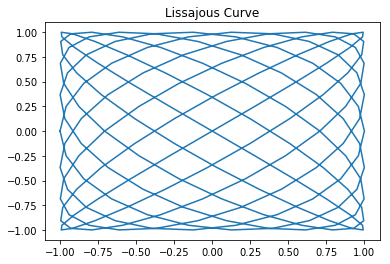

In [195]:
plt.plot(x, y)
plt.title('Lissajous Curve')

## 方波

近似表示多个正弦波的叠加。任意一个方波信号都可以用无穷傅立叶级数表示

方波可以用如下函数表示：$$\sum_{k=1}^\infty\cfrac{4sin((2k-1)t)}{(2k -1)\pi}$$

In [196]:
t = np.linspace(-np.pi, np.pi ,201)
k = np.arange(1, 99.)
k = 2 * k - 1
f = np.zeros_like(t)

In [197]:
# for i in range(len(t)):
#     f[i] = np.sum(np.sin(k * t[i])/k)
# f = (4 / np.pi) * f


def calc_block_wave(ti):
    return np.sum(np.sin(k * ti)/k)
    
func = np.vectorize(calc_block_wave)

f = func(t)
f = (4 / np.pi) * f

Text(0.5,1,'block wave')

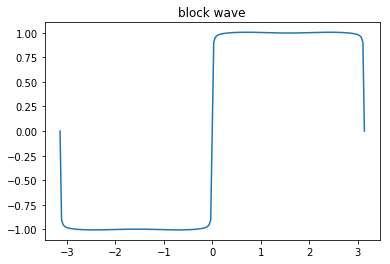

In [198]:
plt.plot(t,f)
plt.title('block wave')

## 锯齿波和三角波

+ 锯齿波 : $$\sum_{k=1}^\infty\cfrac{-2sin(2\pi k t)}{k\pi}$$
+ 锯齿波 取 绝对值 即为三角波

In [199]:
t = np.linspace(-np.pi, np.pi, 201)
k = np.arange(1,99)
f = np.zeros_like(t)

In [200]:
# for i in range(len(t)):
#     f[i] = np.sum(np.sin(2 * np.pi * k * t[i])/k)
# f = (-2/np.pi) * f

def calc_trangle_wave(ti):
    return  np.sum(np.sin(2 * np.pi * k * ti)/k)
    
func = np.vectorize(calc_trangle_wave)

f = func(t)
f = (-2/np.pi) * f

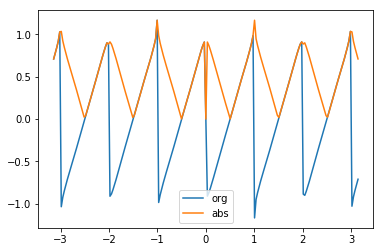

In [201]:
plt.plot(t,f, label='org')
plt.plot(t,np.abs(f), label='abs')
plt.legend(loc='best')

## 位操作函数 比较函数

+ 位操作
    - 整数、整数数组，都是通用函数 `^`, `&`, `\`, `<<`, `>>`
+ 比较
    - `<` `>` `==`
+ `XOR` `^` 不等
    - `^` 对应于 `bitwise_xor`
+ `<<` left_shift

In [202]:
x = np.arange(-9, 9)
y = -x

In [203]:
print("sign different ")
print(x)
(x^y)<0

sign different 
[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [204]:
print("sign different ")
rst = np.less(np.bitwise_xor(x,y), 0)
print(np.vstack((x,rst)))


sign different 
[[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]
 [ 1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1]]


In [205]:
print("Power of 2")
print(x)
(x & (x -1)) == 0

Power of 2
[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]


array([False, False, False, False, False, False, False, False, False,
        True,  True,  True, False,  True, False, False, False,  True], dtype=bool)

In [206]:
print("Power of 2")
print(x)
np.equal(np.bitwise_and(x, x-1), 0)

Power of 2
[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]


array([False, False, False, False, False, False, False, False, False,
        True,  True,  True, False,  True, False, False, False,  True], dtype=bool)

计算余数的技巧实际在模为2的幂数如4，8，16 时有效。 

`<<` left_shift

In [207]:
print("Modulus 4")
print(x)
x & ((1 <<2) -1)

Modulus 4
[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]


array([3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0])

In [208]:
print("Modulus 4")
print(x)
np.bitwise_and(x, np.left_shift(1,2) -1)

Modulus 4
[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]


array([3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0])

In [209]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>